In [1]:
from Basefolder import basefolder
import time
import numpy as np
from Finder_1d import Finder_1d
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
import seaborn as sns
from sklearn.cluster import DBSCAN
from Clustering_CAML import Clustering_CAML
import h5py
from DbscanLoop import DbscanLoop
from sklearn.neighbors import NearestNeighbors
import pickle
import pandas as pd

In [2]:
def PlotScatter(labels=[],filename_add=""):
    
    if(labels == []):
        labels = -1*np.ones((len(XC),));
    
    fig,ax = plt.subplots(1,1,figsize=(6,6)); 
       
    mark = (labels==-1);
    ax.scatter(x=XC[mark,0],y=XC[mark,1],s=.4,c='grey',alpha=0.1);

    mark = (labels>=0);
    sns.scatterplot(x=XC[mark,0],y=XC[mark,1],hue=labels[mark],palette='deep',linewidth=0,
                    s=2,legend=False,ax=ax);
    ax.set_aspect('equal');
    plt.savefig(outputfolder+"results_"+analysis_name+"_"+filename_add+".pdf",bbox_inches="tight");

In [3]:
analysis_name = "temp";
if(False):
    outputfolder = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/ProteinData_ttx_1hr_2/';
    filename     = outputfolder+'AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20.hdf5';

    datascale = 158; #=81/512*1000
    #Define window to analyse
    
    #analysis_name = "dataWindow_1";
    #xInt = [25000,30000];#30000
    #yInt = [25000,30000];#30000
    
    analysis_name = "dataWindow_2";
    xInt = [22000,27000];#30000
    yInt = [22000,27000];#30000    
    
    #To study noise:
    #analysis_name = "noiseAnalysis";
    #xInt = [60000,70000];#30000
    #yInt = [50000,60000];#30000
    
    #To study everything:
#    xInt = [0,np.Infinity];
#    yInt = [0,np.Infinity];
elif(True):
    outputfolder = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/MikeData/';
    filename     = outputfolder +'XC_red.txt'
    datascale    = 1; #=81/512*1000
    #Define window to analyse
    xInt = [0,np.Infinity];
    yInt = [0,np.Infinity];

In [4]:
if(filename[-3:]=="txt"):
    XC = np.loadtxt(filename);
elif(filename[-4:]=="hdf5"):
#filename = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/ProteinData_ttx_1hr_2/AHA_2_MMStack_Pos0.ome_locs_render_driftcor_filter_render_pix0.02X6f20.hdf5';
    f             = h5py.File(filename, 'r')    
    dset          = f['locs'];
    XC            = np.stack((dset["x"],dset["y"])).T    

XC        = np.unique(XC,axis=0);
XC        = datascale*XC;

mark = (XC[:,0]>xInt[0])*(XC[:,0]<xInt[1])*(XC[:,1]>yInt[0])*(XC[:,1]<yInt[1]);
XC   = XC[mark,:];

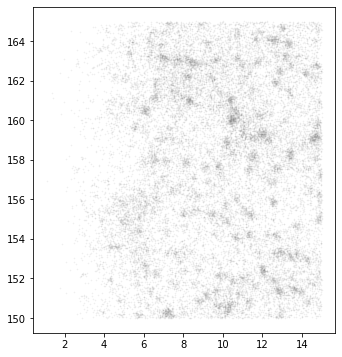

In [5]:
PlotScatter();

In [12]:
if(True):
    FD      = Finder_1d(algo="DbscanLoop");
    labels  = FD.fit(XC);  
    with open(outputfolder+"results_"+analysis_name+'.pickle','wb') as handle:
        pickle.dump({'FD':FD}, handle,protocol=pickle.HIGHEST_PROTOCOL)   

Boundaries for sigma    : 0.06833243615160287 , 0.19970533224271486


KeyboardInterrupt: 

In [8]:
#with open(outputfolder+analysis_name+'.pickle', 'rb') as fr:
#    FD_load = pickle.load(fr);

In [11]:
FD_load

{'labels': array([-1, -1, -1, ..., -1, -1, -1]), 'threshold': 5}

In [6]:
with open(outputfolder+"results_"+analysis_name+'.pickle', 'rb') as fr:
    FD_load = pickle.load(fr);

FileNotFoundError: [Errno 2] No such file or directory: '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/MikeData/results_temp.pickle'

In [9]:
FD = FD_load['FD'];

KeyError: 'FD'

In [10]:
FD.phasespace

NameError: name 'FD' is not defined

<ipython-input-7-4193b01a7292>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(labels == []):


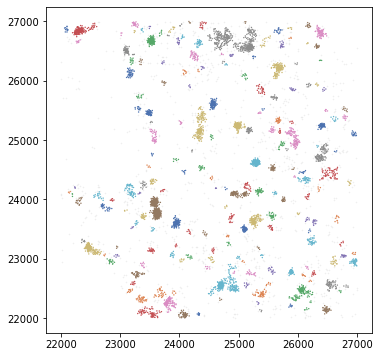

In [17]:
PlotScatter(FD.labels)

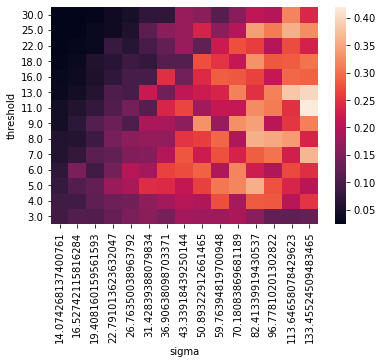

In [18]:
df1 = FD.phasespace[['sigma', 'threshold','time']]
heatmap1_data = pd.pivot_table(df1, values='time', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()
plt.savefig(outputfolder+"results_"+analysis_name+"_computationTimes.pdf",bbox_inches="tight");

In [ ]:
df1 = FD.phasespace[['sigma', 'threshold','no_clusters']]
heatmap1_data = pd.pivot_table(df1, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()
plt.savefig(outputfolder+"results_"+analysis_name+"_noClusters.pdf",bbox_inches="tight");

In [ ]:
FD

In [ ]:
df1 = FD.phasespace[['sigma', 'threshold','no_clusters']]
df1.loc[:,'no_clusters'] = df1.loc[:,'no_clusters']/np.max(df1.loc[:,'no_clusters']);
heatmap1_data = pd.pivot_table(df1, values='no_clusters', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()
plt.savefig(outputfolder+"results_"+analysis_name+"_noClusters_normalized.pdf",bbox_inches="tight");

In [ ]:
df1 = FD.phasespace[['sigma', 'threshold','similarityScore']]
heatmap1_data = pd.pivot_table(df1, values='similarityScore', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()
plt.savefig(outputfolder+"results_"+analysis_name+"_similarityScore.pdf",bbox_inches="tight");

In [ ]:
FD.phasespace['similarityScore_mod']=FD.phasespace['similarityScore']/FD.phasespace['no_clusters']
df1 = FD.phasespace[['sigma', 'threshold','similarityScore_mod']]
heatmap1_data = pd.pivot_table(df1, values='similarityScore_mod', 
                     index=['threshold'], 
                     columns='sigma')
ax = sns.heatmap(heatmap1_data);
ax.invert_yaxis()
plt.savefig(outputfolder+"results_"+analysis_name+"_similarityScore_over_noClusters.pdf",bbox_inches="tight");